# Challenge 2

### Mapping your data

### The netcdf files can be read in Python using the netcdf4 library

In [ ]:
import netCDF4 as nc4

### Next, let’s read the file in:

In [2]:
from netCDF4 import Dataset
import numpy as np

my_example_nc_file = 'S5P_OFFL_L2__NO2____20190116T235637_20190117T013807_06535_01_010202_20190123T102649.nc'
fh = Dataset(my_example_nc_file, mode='r')
print (fh)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id: 17025a7b-4510-4005-b19f-211a5867abf9
    id: S5P_OFFL_L2__NO2____20190116T235637_20190117T013807_06535_01_010202_20190123T102649
    time_reference: 2019-01-16T00:00:00Z
    time_reference_days_since_1950: 25217
    time_reference_julian_day: 2458499.5
    time_reference_seconds_since_1970: 1547596800
    time_coverage_start: 2019-01-17T00:18:11Z
    time_coverage_end: 2019-01-17T01:16:36Z
    time_coverage_duration: PT3505.000S
    time_coverage_resolution: PT1.080S
    orbit: 6535
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processor_version: 1.2.2
    keywords_vocabulary: AGU index terms, http://publications.agu.org/author-resource-center/index-terms/
    keywords: 0345 Pollution, U

### Print (fh) to see if the file has been loaded. This should return a lot of information about the file, such as when it was acquired, what sensor and its version, among many other things.

#### Next, let’s drill into the data.

In [3]:
print (fh.groups)

print (fh.groups['PRODUCT'])


{'PRODUCT': <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(3246), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time, scanline, ground_pixel), float32 longitude(time, scanline, ground_pixel), int32 delta_time(time, scanline), <class 'str'> time_utc(time, scanline), uint8 qa_value(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time, scanline, ground_pix

### By printing the fh.groups we can find the groups in the data, which are called ‘PRODUCT’ and ‘METADATA’. By printing fh.groups[‘PRODUCT’] we find the product has data about the dimension and variables.

In [4]:
print (fh.groups['PRODUCT'].variables.keys())

#By printing the .variables.keys() we can see that this .nc file has the following variables:

dict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])


In [5]:
#If we select one of these variables, say the ‘nitrogendioxide_tropospheric_column_precision’ using this command…

print (fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'])

#…we will finally get information about the data itself. You will see that the data has a value called current shape which we can convert into a numpy array.

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide standard_error
    long_name: Precision of the tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    multiplication_factor_to_convert_to_molecules_percm2: 6.022141e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 3246, 450)
filling on


### Next we are taking the latitude, longtitude and no2 values which we will map.

In [6]:
lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'][0,:,:]
print (lons.shape)
print (lats.shape)
print (no2.shape)

(3246, 450)
(3246, 450)
(3246, 450)


In [7]:
no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'].units
# this line gets the units of NO2 so we can add it to the plot later on

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.basemap import Basemap

### Next, we setup a Basemap instance, specifying our desired map and projection settings.

In [12]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

xi, yi = m(lons, lats)

### Now, we can plot the data using one of the available plot types (pcolor, pcolormesh, contour, contourf, scatter, etc.). Here we use pcolor. Gridlines, colorbars, and axis labels can also be added at this point.


<ipython-input-13-9389438b69b7>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')


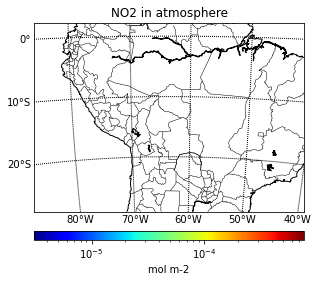

In [13]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title('NO2 in atmosphere')
plt.show()

# Try it yourself!

#### 1. Open your netCDF file

#### 2. Read your file and print it to see the information

#### 3. Explore different groups within the file

#### 4. Open the PRODUCT group to get dimensions and variables

#### 5. Open the variables and get more information about the data like the shape and convert to a numpy array

#### 6. Get the latitude, longtitude and no2 values

#### 7. Create basemap instance, specifying desired map and projection settings

#### 8. Plot your data

Note: You can refer to the link below more understanding 

https://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/ 

There are, of course, many more options and variations to plotting with Maplotlib and Basemap. The [Basemap examples](https://matplotlib.org/basemap/users/examples.html) page includes a nice handful of different plot configurations.



### *Explore similar functions for your other data files!*